In [1]:
# source / target dir
data_dir = "../../data/benchmarking-jmh/imagesize/*" 
save_dir = "../images/imagesize/" 

# activating autoreload
%load_ext autoreload
%autoreload 2

import sys
from script import create_master_dataframe

In [2]:
# creating a sub-dataframe based on conditions

from script import cond_and

# creating a cumulative dataframe from all the files
mdf = create_master_dataframe(data_dir)

name = "clij_ij_comparison"

cond_pc = mdf["Filename"].str.contains(name) # cond computer name
cond_list = [cond_pc] # combine them in a list
cond = cond_and(cond_list) # generate their intersection

# creating a sub-dataframe that satisfies the respective conditions
#mdf = mdf[cond]
mdf = mdf.drop(["Param: radius"], axis=1)

# sizes; as specified in clij-benchmarking-jmh repository:
sizes2D = [
    1 * 1 * 1,
    512 * 512 * 1,
    1024 * 1024 * 1,
    2048 * 2048 * 1,
    4096 * 4096 * 1]

sizes3D = [
    1 * 1 * 1,
    1024 * 1024 * 8,
    1024 * 1024 * 16,
    1024 * 1024 * 32,
    1024 * 1024 * 64]

def fixSizes(row):
    size = row['Param: size']
    benchmark = row['Benchmark']
    
    bytesPerPixel = 2
    
    if "2D" in benchmark:
        size = sizes2D[size] * bytesPerPixel / 1024 / 1024 # convert in MB
    else:
        size = sizes3D[size] * bytesPerPixel  / 1024 / 1024 # convert in MB
    return size

# replace size placeholders (0,1,2,3,4) with actual size in MB
mdf['Param: size'] = mdf.apply(lambda row: fixSizes(row), axis=1)


In [3]:
mdf

,Filename,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Param: size
0,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,avgt,1,10,7.786996e+05,1.944010e+04,ns/op,0.000002
1,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,avgt,1,10,1.335452e+06,1.562374e+05,ns/op,0.500000
2,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,avgt,1,10,1.488832e+06,7.360688e+04,ns/op,2.000000
3,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,avgt,1,10,2.914040e+06,7.554456e+04,ns/op,8.000000
4,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,avgt,1,10,8.015860e+06,1.852830e+05,ns/op,32.000000
0,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,avgt,1,10,1.058408e+03,3.028137e+02,ns/op,0.000002
1,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,avgt,1,10,4.202082e+05,3.210116e+04,ns/op,0.500000
2,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,avgt,1,10,1.877479e+06,5.226117e+05,ns/op,2.000000
3,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,avgt,1,10,8.677120e+06,3.336460e+06,ns/op,8.000000
4,imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...,net.haesleinhuepf.clij.benchmark.jmh.AddImages...,avgt,1,10,3.375777e+07,1.165185e+07,ns/op,32.000000


----- processing a new frame -----
----- detected operations:
AddImagesWeighted2D
AddImagesWeighted3D
AddScalar2D
AddScalar3D
AutoThreshold2D
AutoThreshold3D
BinaryAnd2D
BinaryAnd3D
Erode2D
Erode3D
FixedThreshold2D
FixedThreshold3D
Flip2D
Flip3D
GaussianBlur2D
GaussianBlur3D
MaximumZProjection
Mean2D
Mean3D
Median2D
Median3D
Minimum2D
Minimum3D
MultiplyScalar2D
MultiplyScalar3D
RadialReslice
Rotate2D
Rotate3D
----- detected machines:
MYERS-PC-21
MYERS-PC-22
----- detected benchmarks:
clij
ijapi
ijrun
clij_sphere
vib
----- detected params:
Param: size
----- parameter Param: size has the following values:
[1.90734863e-06 5.00000000e-01 2.00000000e+00 8.00000000e+00
 3.20000000e+01 1.60000000e+01 6.40000000e+01 1.28000000e+02]
----- processing operation: AddImagesWeighted2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
1  imagesize\jmh-result_MYERS-P

C:\Users\rober\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\rober\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\rober\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


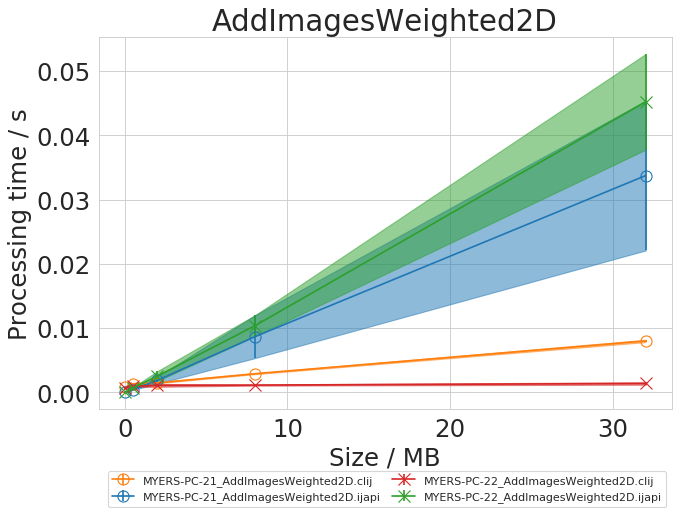

----- processing operation: AddImagesWeighted3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
1  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
2  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
3  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
4  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
0  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
1  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
2  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
3  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   
4  imagesize\jmh-result_MYERS-PC-21_.AddImagesWei...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.AddImages...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.AddImages...  avgt        1       10   
2  net.haesleinhuepf

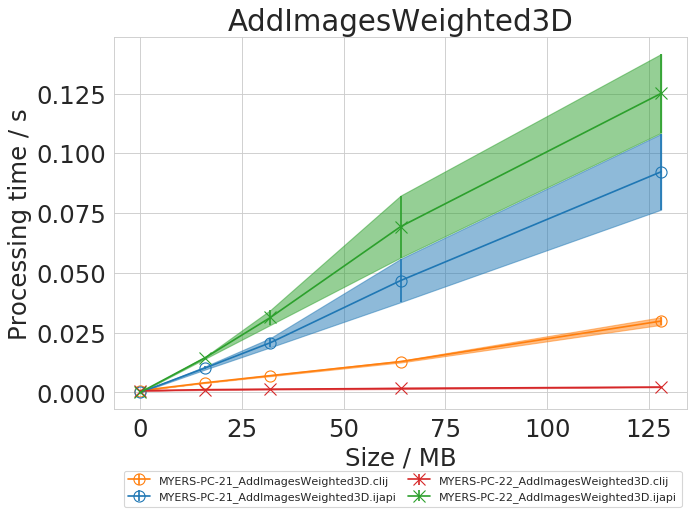

----- processing operation: AddScalar2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
1  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
2  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
3  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
4  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
0  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
1  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
2  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
3  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   
4  imagesize\jmh-result_MYERS-PC-21_.AddScalar2D....   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.AddScalar...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.AddScalar...  avgt        1       10   
2  net.haesleinhuepf.clij.be

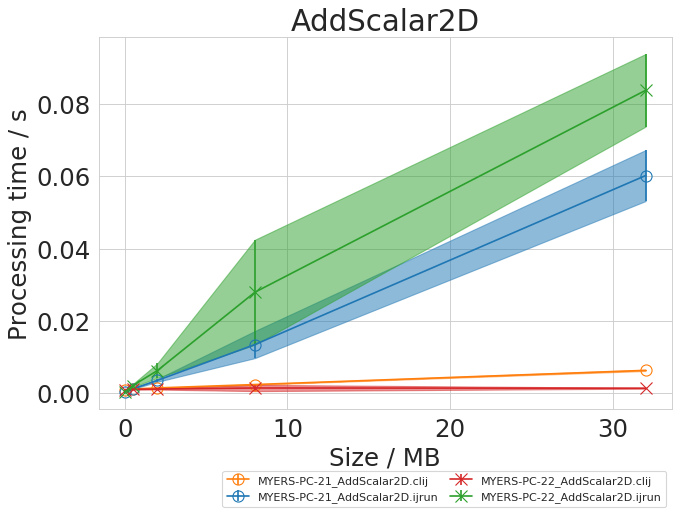

----- processing operation: AddScalar3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
1  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
2  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
3  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
4  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
0  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
1  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
2  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
3  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   
4  imagesize\jmh-result_MYERS-PC-21_.AddScalar3D....   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.AddScalar...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.AddScalar...  avgt        1       10   
2  net.haesleinhuepf.clij.be

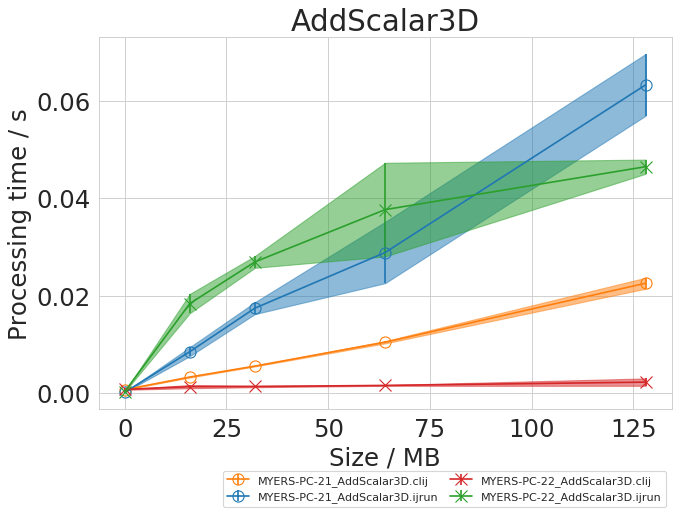

----- processing operation: AutoThreshold2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
1  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
2  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
3  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
4  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
0  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
1  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
2  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
3  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
4  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.AutoThres...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.AutoThres...  avgt        1       10   
2  net.haesleinhuepf.cli

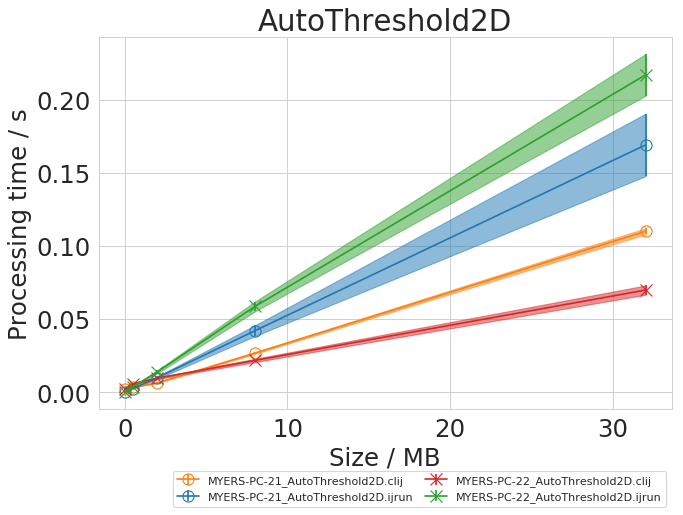

----- processing operation: AutoThreshold3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
1  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
2  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
3  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
4  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
0  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
1  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
2  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
3  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   
4  imagesize\jmh-result_MYERS-PC-21_.AutoThreshol...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.AutoThres...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.AutoThres...  avgt        1       10   
2  net.haesleinhuepf.cli

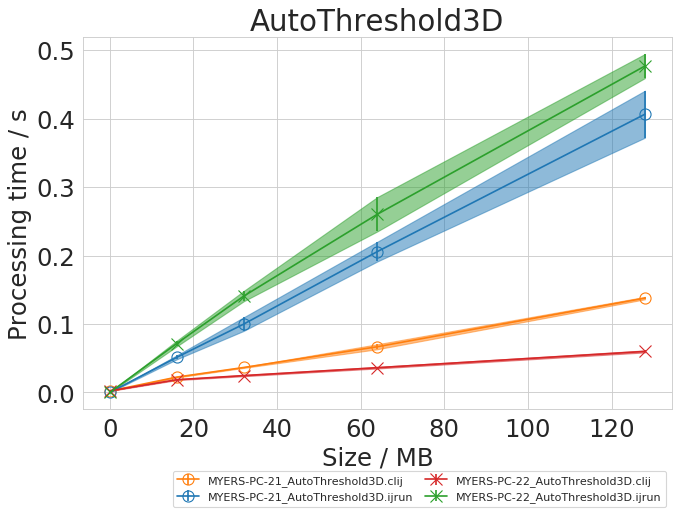

----- processing operation: BinaryAnd2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
1  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
2  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
3  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
4  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
0  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
1  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
2  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
3  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   
4  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd2D....   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.BinaryAnd...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.BinaryAnd...  avgt        1       10   
2  net.haesleinhuepf.clij.be

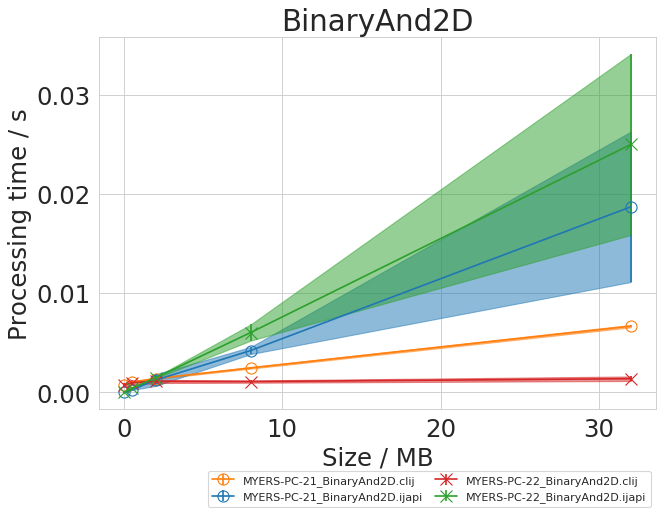

----- processing operation: BinaryAnd3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
1  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
2  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
3  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
4  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
0  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
1  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
2  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
3  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   
4  imagesize\jmh-result_MYERS-PC-21_.BinaryAnd3D....   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.BinaryAnd...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.BinaryAnd...  avgt        1       10   
2  net.haesleinhuepf.clij.be

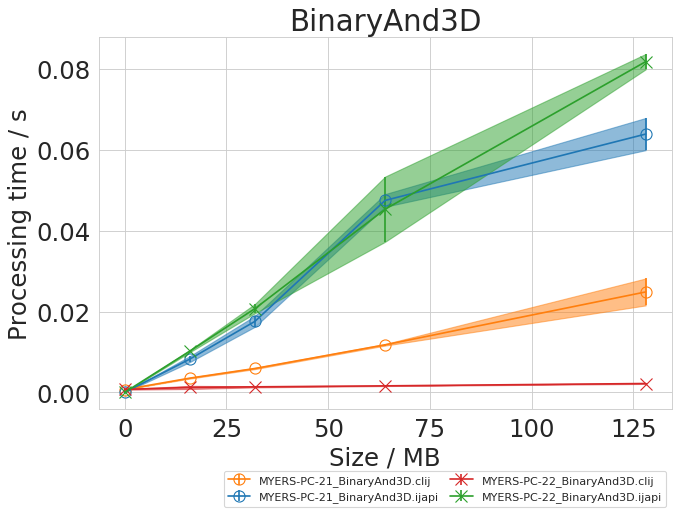

----- processing operation: Erode2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
1  imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
2  imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
3  imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
4  imagesize\jmh-result_MYERS-PC-21_.Erode2D.clij...   
0  imagesize\jmh-result_MYERS-PC-21_.Erode2D.ijru...   
1  imagesize\jmh-result_MYERS-PC-21_.Erode2D.ijru...   
2  imagesize\jmh-result_MYERS-PC-21_.Erode2D.ijru...   
3  imagesize\jmh-result_MYERS-PC-21_.Erode2D.ijru...   
4  imagesize\jmh-result_MYERS-PC-21_.Erode2D.ijru...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.Erode2D.c...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.Erode2D.c...  avgt        1       10   
2  net.haesleinhuepf.clij.benchm

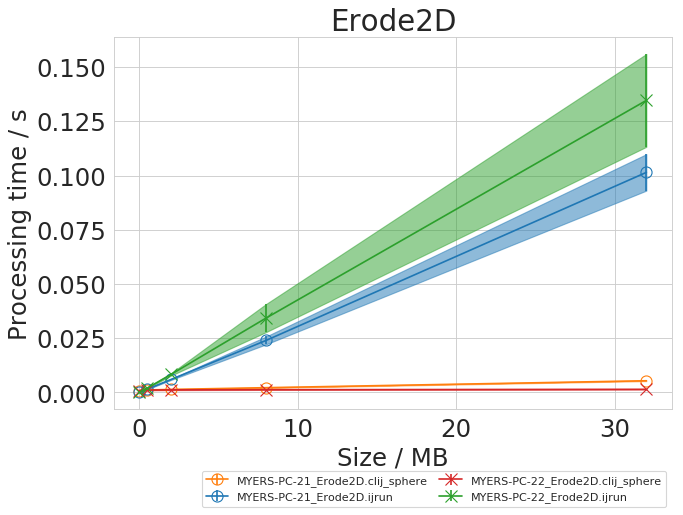

----- processing operation: Erode3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
1  imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
2  imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
3  imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
4  imagesize\jmh-result_MYERS-PC-21_.Erode3D.clij...   
0  imagesize\jmh-result_MYERS-PC-21_.Erode3D.vib.csv   
1  imagesize\jmh-result_MYERS-PC-21_.Erode3D.vib.csv   
2  imagesize\jmh-result_MYERS-PC-21_.Erode3D.vib.csv   
3  imagesize\jmh-result_MYERS-PC-21_.Erode3D.vib.csv   
4  imagesize\jmh-result_MYERS-PC-21_.Erode3D.vib.csv   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.Erode3D.c...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.Erode3D.c...  avgt        1       10   
2  net.haesleinhuepf.clij.benchm

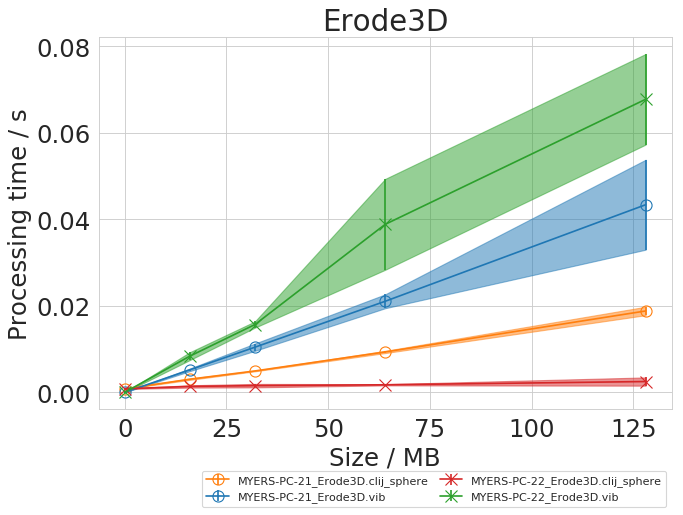

----- processing operation: FixedThreshold2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
1  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
2  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
3  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
4  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
0  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
1  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
2  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
3  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
4  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.FixedThre...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.FixedThre...  avgt        1       10   
2  net.haesleinhuepf.cl

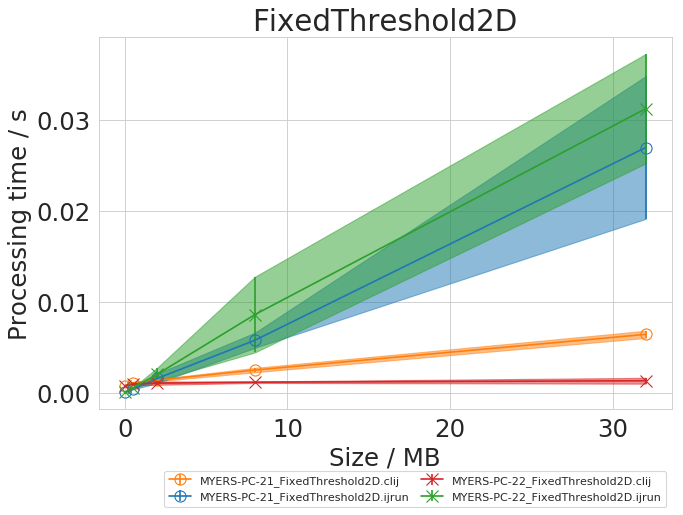

----- processing operation: FixedThreshold3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
1  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
2  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
3  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
4  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
0  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
1  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
2  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
3  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   
4  imagesize\jmh-result_MYERS-PC-21_.FixedThresho...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.FixedThre...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.FixedThre...  avgt        1       10   
2  net.haesleinhuepf.cl

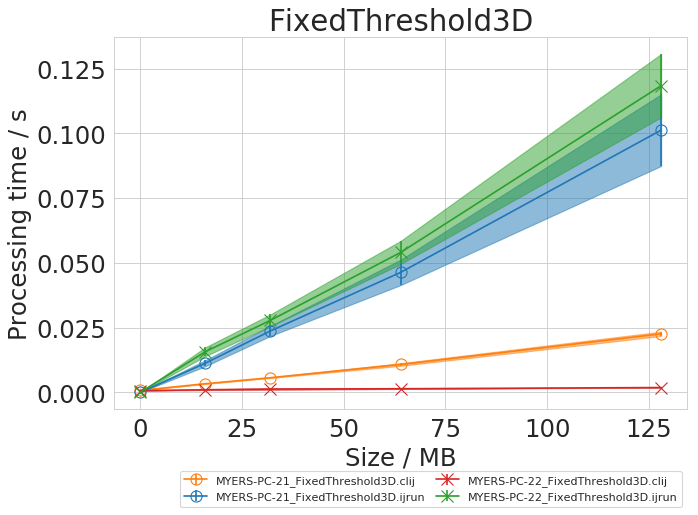

----- processing operation: Flip2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
1  imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
2  imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
3  imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
4  imagesize\jmh-result_MYERS-PC-21_.Flip2D.clij.csv   
0  imagesize\jmh-result_MYERS-PC-21_.Flip2D.ijrun...   
1  imagesize\jmh-result_MYERS-PC-21_.Flip2D.ijrun...   
2  imagesize\jmh-result_MYERS-PC-21_.Flip2D.ijrun...   
3  imagesize\jmh-result_MYERS-PC-21_.Flip2D.ijrun...   
4  imagesize\jmh-result_MYERS-PC-21_.Flip2D.ijrun...   

                                           Benchmark  Mode  Threads  Samples  \
0   net.haesleinhuepf.clij.benchmark.jmh.Flip2D.clij  avgt        1       10   
1   net.haesleinhuepf.clij.benchmark.jmh.Flip2D.clij  avgt        1       10   
2   net.haesleinhuepf.clij.benchm

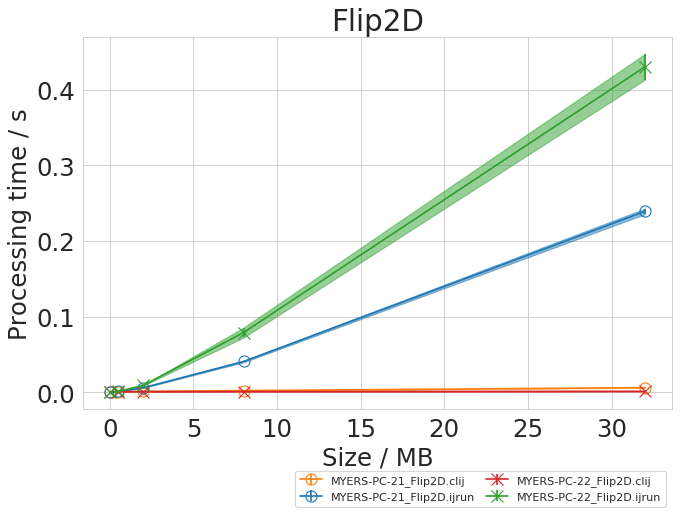

----- processing operation: Flip3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
1  imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
2  imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
3  imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
4  imagesize\jmh-result_MYERS-PC-21_.Flip3D.clij.csv   
0  imagesize\jmh-result_MYERS-PC-21_.Flip3D.ijrun...   
1  imagesize\jmh-result_MYERS-PC-21_.Flip3D.ijrun...   
2  imagesize\jmh-result_MYERS-PC-21_.Flip3D.ijrun...   
3  imagesize\jmh-result_MYERS-PC-21_.Flip3D.ijrun...   
4  imagesize\jmh-result_MYERS-PC-21_.Flip3D.ijrun...   

                                           Benchmark  Mode  Threads  Samples  \
0   net.haesleinhuepf.clij.benchmark.jmh.Flip3D.clij  avgt        1       10   
1   net.haesleinhuepf.clij.benchmark.jmh.Flip3D.clij  avgt        1       10   
2   net.haesleinhuepf.clij.benchm

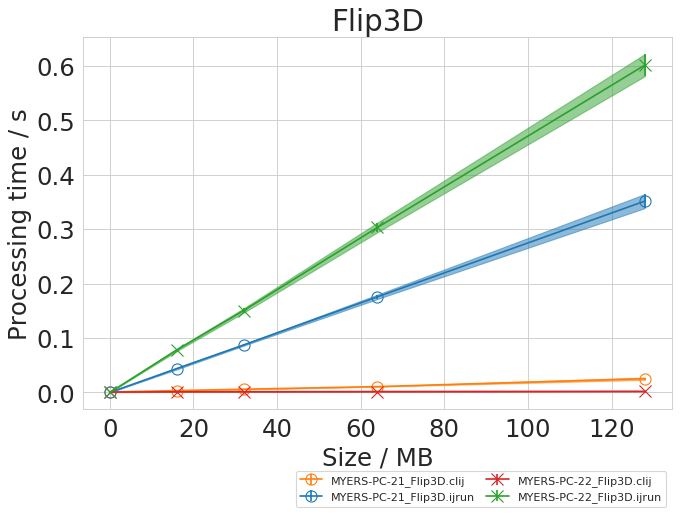

----- processing operation: GaussianBlur2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
1  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
2  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
3  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
4  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
0  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
1  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
2  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
3  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
4  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.GaussianB...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.GaussianB...  avgt        1       10   
2  net.haesleinhuepf.clij

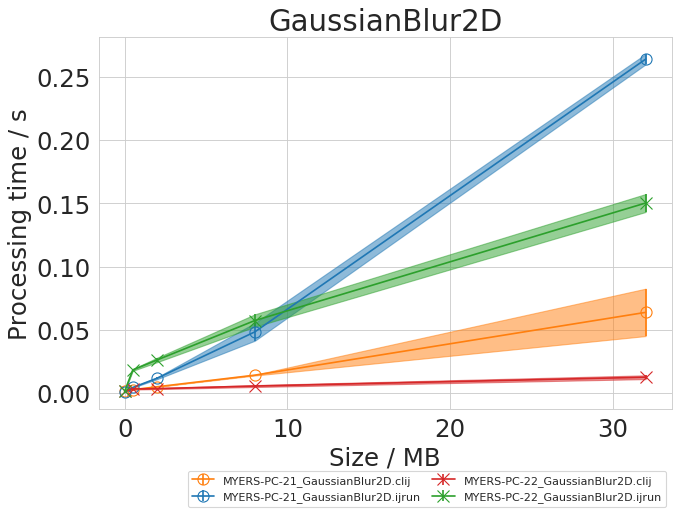

----- processing operation: GaussianBlur3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
1  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
2  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
3  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
4  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
0  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
1  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
2  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
3  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   
4  imagesize\jmh-result_MYERS-PC-21_.GaussianBlur...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.GaussianB...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.GaussianB...  avgt        1       10   
2  net.haesleinhuepf.clij

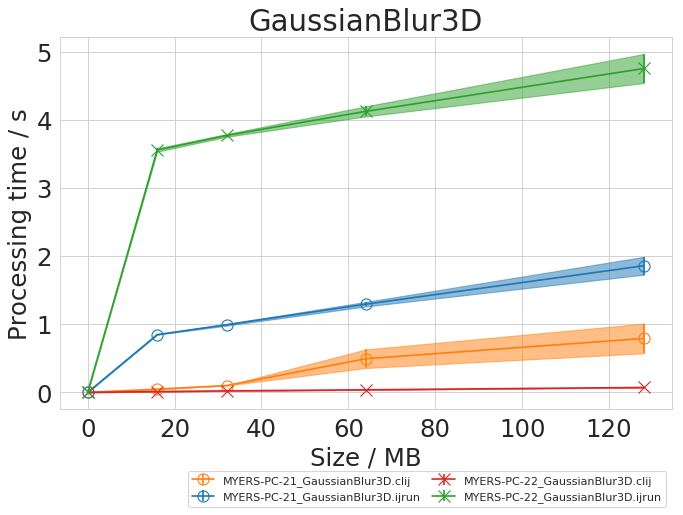

----- processing operation: MaximumZProjection -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
1  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
2  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
3  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
4  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
0  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
1  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
2  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
3  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   
4  imagesize\jmh-result_MYERS-PC-21_.MaximumZProj...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.MaximumZP...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.MaximumZP...  avgt        1       10   
2  net.haesleinhuepf.

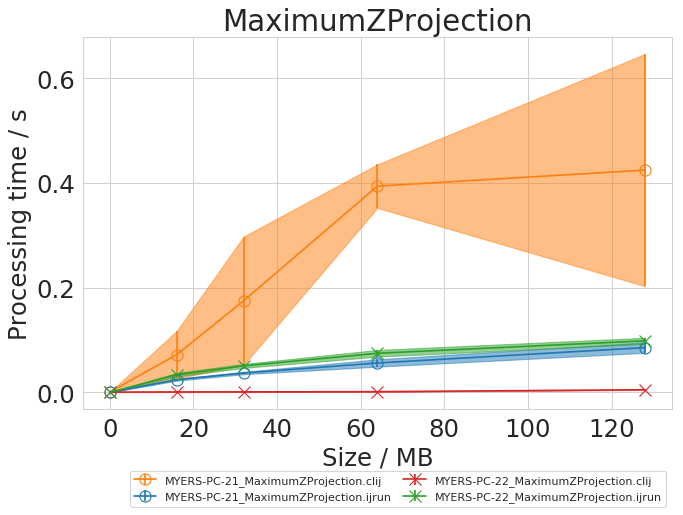

----- processing operation: Mean2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
1  imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
2  imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
3  imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
4  imagesize\jmh-result_MYERS-PC-21_.Mean2D.clij_...   
0  imagesize\jmh-result_MYERS-PC-21_.Mean2D.ijrun...   
1  imagesize\jmh-result_MYERS-PC-21_.Mean2D.ijrun...   
2  imagesize\jmh-result_MYERS-PC-21_.Mean2D.ijrun...   
3  imagesize\jmh-result_MYERS-PC-21_.Mean2D.ijrun...   
4  imagesize\jmh-result_MYERS-PC-21_.Mean2D.ijrun...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.Mean2D.cl...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.Mean2D.cl...  avgt        1       10   
2  net.haesleinhuepf.clij.benchma

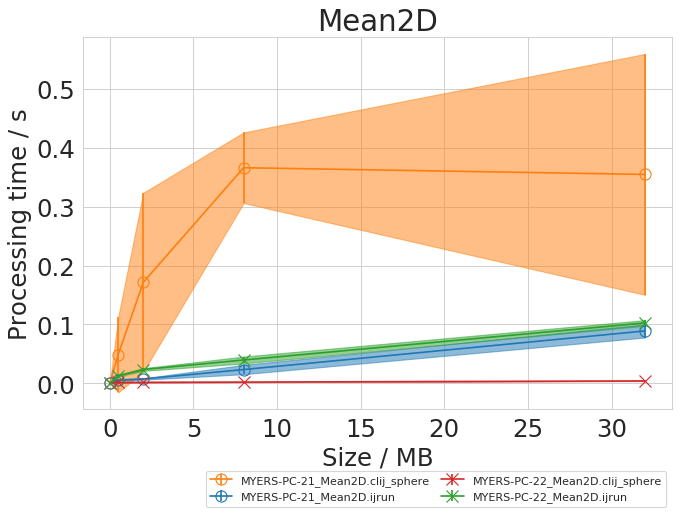

----- processing operation: Mean3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
1  imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
2  imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
3  imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
4  imagesize\jmh-result_MYERS-PC-21_.Mean3D.clij_...   
0  imagesize\jmh-result_MYERS-PC-21_.Mean3D.ijrun...   
1  imagesize\jmh-result_MYERS-PC-21_.Mean3D.ijrun...   
2  imagesize\jmh-result_MYERS-PC-21_.Mean3D.ijrun...   
3  imagesize\jmh-result_MYERS-PC-21_.Mean3D.ijrun...   
4  imagesize\jmh-result_MYERS-PC-21_.Mean3D.ijrun...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.Mean3D.cl...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.Mean3D.cl...  avgt        1       10   
2  net.haesleinhuepf.clij.benchma

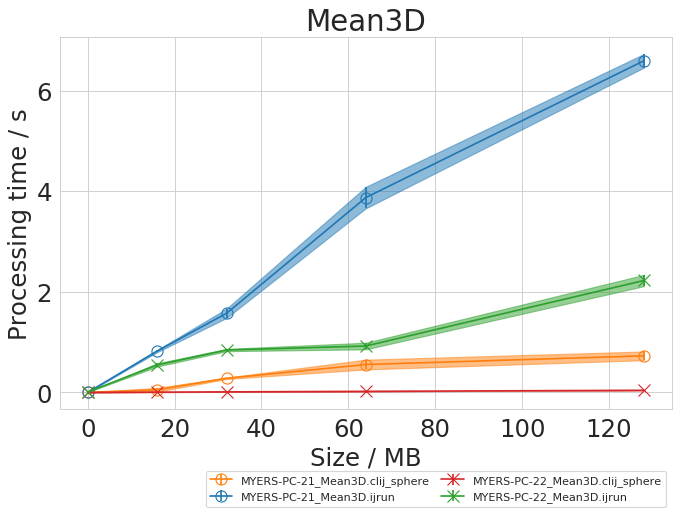

----- processing operation: Median2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
1  imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
2  imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
3  imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
4  imagesize\jmh-result_MYERS-PC-21_.Median2D.cli...   
0  imagesize\jmh-result_MYERS-PC-21_.Median2D.ijr...   
1  imagesize\jmh-result_MYERS-PC-21_.Median2D.ijr...   
2  imagesize\jmh-result_MYERS-PC-21_.Median2D.ijr...   
3  imagesize\jmh-result_MYERS-PC-21_.Median2D.ijr...   
4  imagesize\jmh-result_MYERS-PC-21_.Median2D.ijr...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.Median2D....  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.Median2D....  avgt        1       10   
2  net.haesleinhuepf.clij.bench

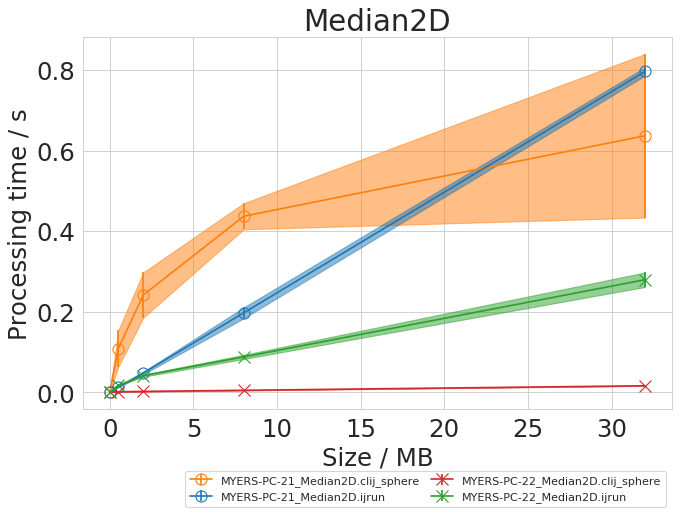

----- processing operation: Median3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
1  imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
2  imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
3  imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
4  imagesize\jmh-result_MYERS-PC-21_.Median3D.cli...   
0  imagesize\jmh-result_MYERS-PC-21_.Median3D.ijr...   
1  imagesize\jmh-result_MYERS-PC-21_.Median3D.ijr...   
2  imagesize\jmh-result_MYERS-PC-21_.Median3D.ijr...   
3  imagesize\jmh-result_MYERS-PC-21_.Median3D.ijr...   
4  imagesize\jmh-result_MYERS-PC-21_.Median3D.ijr...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.Median3D....  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.Median3D....  avgt        1       10   
2  net.haesleinhuepf.clij.bench

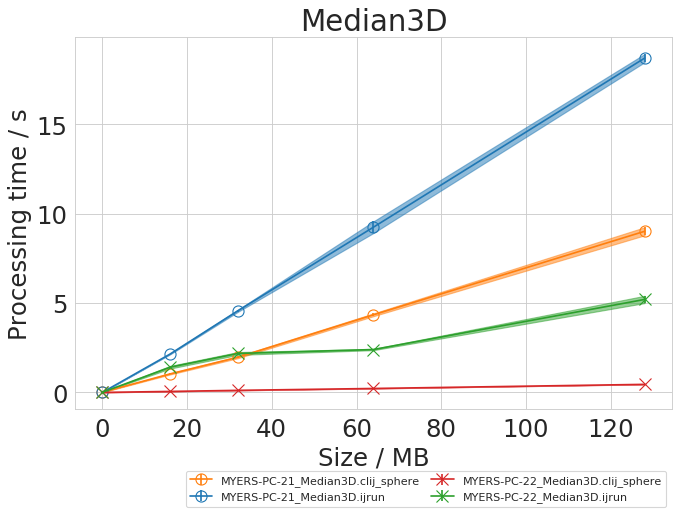

----- processing operation: Minimum2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
1  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
2  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
3  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
4  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.cl...   
0  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.ij...   
1  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.ij...   
2  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.ij...   
3  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.ij...   
4  imagesize\jmh-result_MYERS-PC-21_.Minimum2D.ij...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.Minimum2D...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.Minimum2D...  avgt        1       10   
2  net.haesleinhuepf.clij.benc

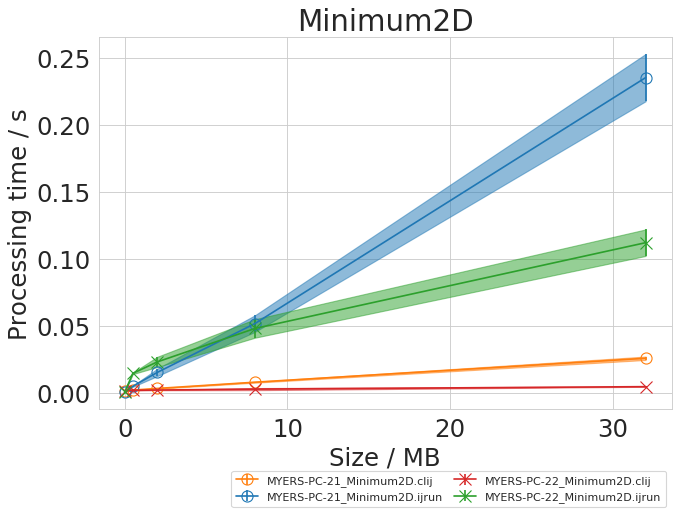

----- processing operation: Minimum3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
1  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
2  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
3  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
4  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.cl...   
0  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.ij...   
1  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.ij...   
2  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.ij...   
3  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.ij...   
4  imagesize\jmh-result_MYERS-PC-21_.Minimum3D.ij...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.Minimum3D...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.Minimum3D...  avgt        1       10   
2  net.haesleinhuepf.clij.benc

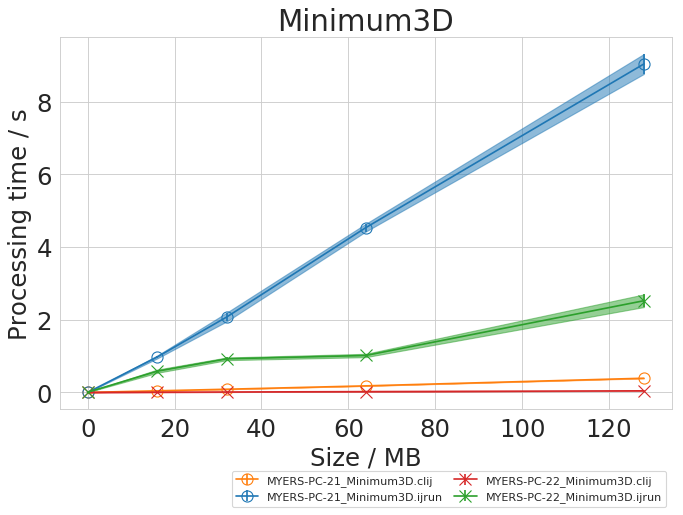

----- processing operation: MultiplyScalar2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
1  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
2  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
3  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
4  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
0  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
1  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
2  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
3  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
4  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.MultiplyS...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.MultiplyS...  avgt        1       10   
2  net.haesleinhuepf.cl

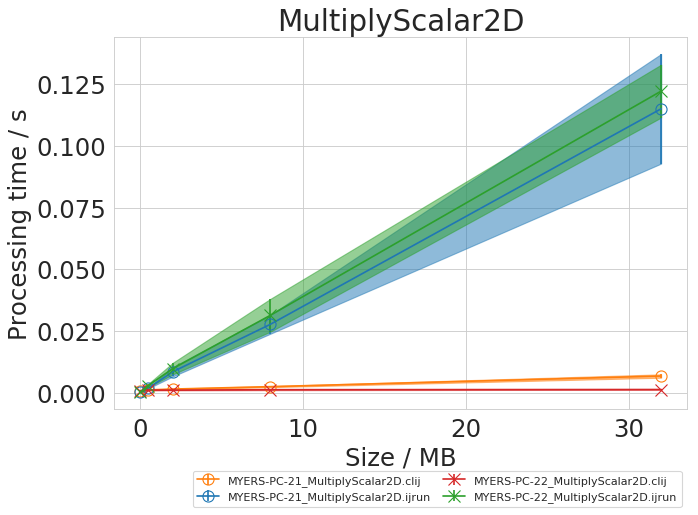

----- processing operation: MultiplyScalar3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
1  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
2  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
3  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
4  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
0  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
1  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
2  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
3  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   
4  imagesize\jmh-result_MYERS-PC-21_.MultiplyScal...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.MultiplyS...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.MultiplyS...  avgt        1       10   
2  net.haesleinhuepf.cl

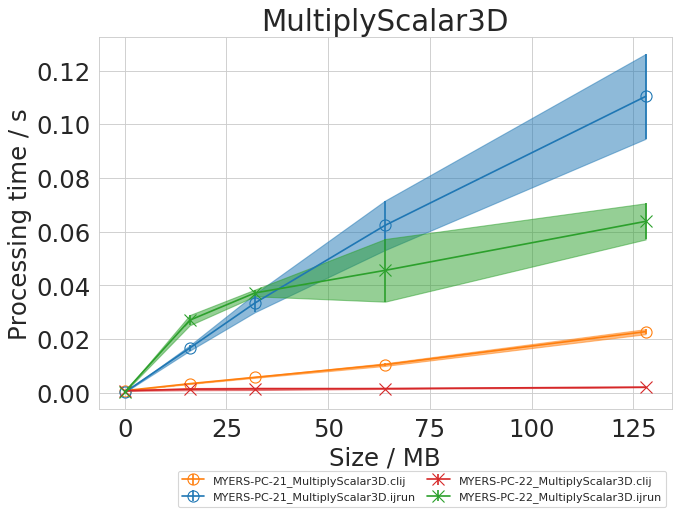

----- processing operation: RadialReslice -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
1  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
2  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
3  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
0  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
1  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
2  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
3  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   
4  imagesize\jmh-result_MYERS-PC-21_.RadialReslic...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.RadialRes...  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.RadialRes...  avgt        1       10   
2  net.haesleinhuepf.clij.benchmark.jmh.RadialRes...  avgt        1       10   
3 

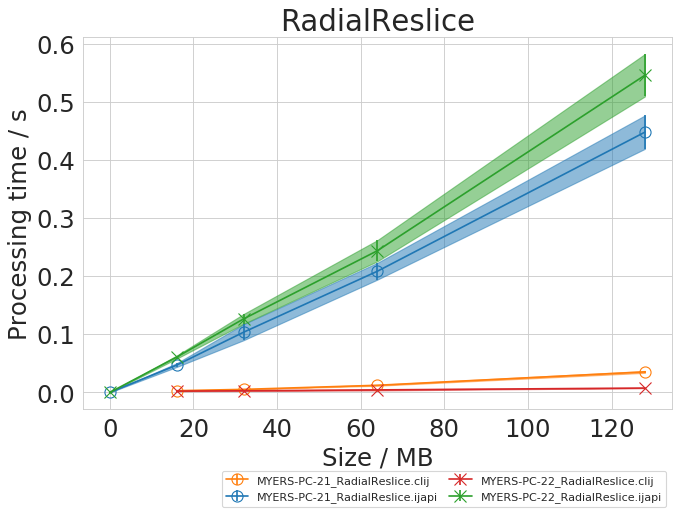

----- processing operation: Rotate2D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
1  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
2  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
3  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
4  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.cli...   
0  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.ijr...   
1  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.ijr...   
2  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.ijr...   
3  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.ijr...   
4  imagesize\jmh-result_MYERS-PC-21_.Rotate2D.ijr...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.Rotate2D....  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.Rotate2D....  avgt        1       10   
2  net.haesleinhuepf.clij.bench

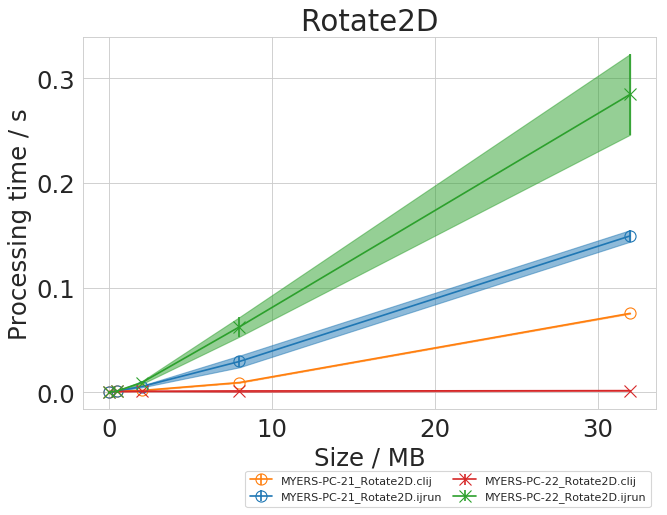

----- processing operation: Rotate3D -----
------> processing param Param: size...
-----> other param values ()
                                            Filename  \
0  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
1  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
2  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
3  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
4  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.cli...   
0  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.ijr...   
1  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.ijr...   
2  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.ijr...   
3  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.ijr...   
4  imagesize\jmh-result_MYERS-PC-21_.Rotate3D.ijr...   

                                           Benchmark  Mode  Threads  Samples  \
0  net.haesleinhuepf.clij.benchmark.jmh.Rotate3D....  avgt        1       10   
1  net.haesleinhuepf.clij.benchmark.jmh.Rotate3D....  avgt        1       10   
2  net.haesleinhuepf.clij.bench

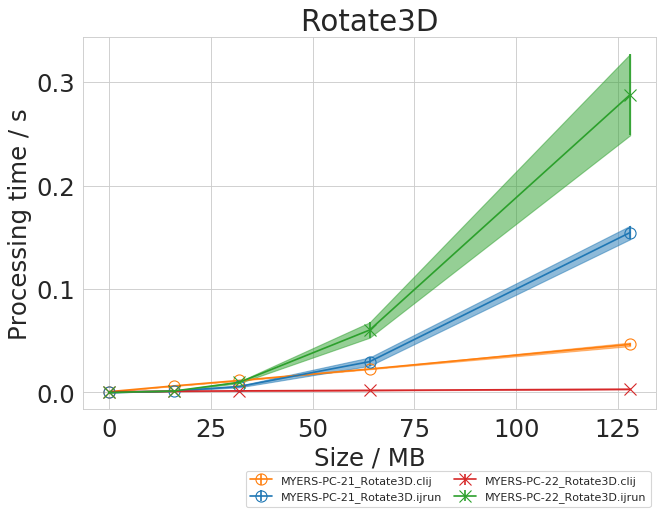

In [4]:
from script import process_frame
f = process_frame(mdf, verbose=1, save_dir=save_dir, name=name)